Notation:
  - l0: Layer 0, the input layer
  - l2: Layer 2, the output layer
  - w: weights
  - y: labels

In [2]:
import numpy as np

features = 2
samples = 5

l0 = np.random.random((samples, features))
l0 

array([[0.14468221, 0.49004246],
       [0.59446274, 0.68555971],
       [0.08517819, 0.41659876],
       [0.25141303, 0.49884628],
       [0.24700191, 0.23413613]])

In [3]:
w = np.random.random((features, 1))
w

array([[0.90657377],
       [0.45484765]])

In [4]:
l2 = np.dot(l0, w)
l2

array([[0.35405976],
       [0.85074955],
       [0.26670928],
       [0.45482352],
       [0.33042172]])

In [5]:
y = l0[:, 0] * 0.5 + l0[:, 1]
y = y.reshape(-1, 1)
y

array([[0.56238357],
       [0.98279108],
       [0.45918785],
       [0.6245528 ],
       [0.35763708]])

Now we compute the errors, defined as the difference between the output layer and the labels

In [6]:
e = l2 - y
e

array([[-0.20832381],
       [-0.13204153],
       [-0.19247858],
       [-0.16972928],
       [-0.02721536]])

For the loss function, we use the mean-squared error.

In [7]:
mse = (e ** 2).mean()
mse

0.025486096792676594

Now, we'll implement backpropagation for our simple NN.

In [8]:
d = e * l2
d

array([[-0.07375908],
       [-0.11233427],
       [-0.05133582],
       [-0.07719687],
       [-0.00899255]])

In [21]:
a = 0.01 # Learning rate

In [22]:
u = a * np.dot(l0.T, d)
u

array([[inf],
       [inf],
       [inf],
       [inf],
       [inf]])

In [23]:
w -= u

In [24]:
l2 = np.dot(l0, w)

Now we repeat the evaluation of the mean-squared error to demonstrate that the error rate is decreasing and our weights are "learning". 

In [25]:
e = l2 - y
e
mse_2 = (e ** 2).mean()
mse_2 - mse 

/var/folders/8x/br7f10td3n9_hhc6wr64_vgh0000gp/T/ipykernel_41270/2503628778.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  mse_2 - mse


nan

To finish the learing process, let us iterate the procedure 1,000 times 

In [26]:
steps = int(1e3)

w = np.random.random((features, 1))
w # weights

for s in range(1, steps + 1) :
  l2 = np.dot(l0, w)
  e = l2 - y
  d = e * l2
  w -= a * np.dot(l0.T, d)
  if s % 20 == 0:
    mse = (e ** 2).mean()
    print (f'step={s:4d} | mse={mse: 4f}')

step=  20 | mse= 0.351280
step=  40 | mse= 0.133443
step=  60 | mse= 0.067998
step=  80 | mse= 0.040519
step= 100 | mse= 0.026707
step= 120 | mse= 0.018930
step= 140 | mse= 0.014198
step= 160 | mse= 0.011149
step= 180 | mse= 0.009097
step= 200 | mse= 0.007669
step= 220 | mse= 0.006648
step= 240 | mse= 0.005900
step= 260 | mse= 0.005343
step= 280 | mse= 0.004920
step= 300 | mse= 0.004595
step= 320 | mse= 0.004343
step= 340 | mse= 0.004144
step= 360 | mse= 0.003986
step= 380 | mse= 0.003859
step= 400 | mse= 0.003757
step= 420 | mse= 0.003673
step= 440 | mse= 0.003604
step= 460 | mse= 0.003548
step= 480 | mse= 0.003500
step= 500 | mse= 0.003460
step= 520 | mse= 0.003426
step= 540 | mse= 0.003397
step= 560 | mse= 0.003371
step= 580 | mse= 0.003349
step= 600 | mse= 0.003330
step= 620 | mse= 0.003313
step= 640 | mse= 0.003297
step= 660 | mse= 0.003283
step= 680 | mse= 0.003270
step= 700 | mse= 0.003258
step= 720 | mse= 0.003247
step= 740 | mse= 0.003237
step= 760 | mse= 0.003227
step= 780 | 

Below we introduce an activation function.

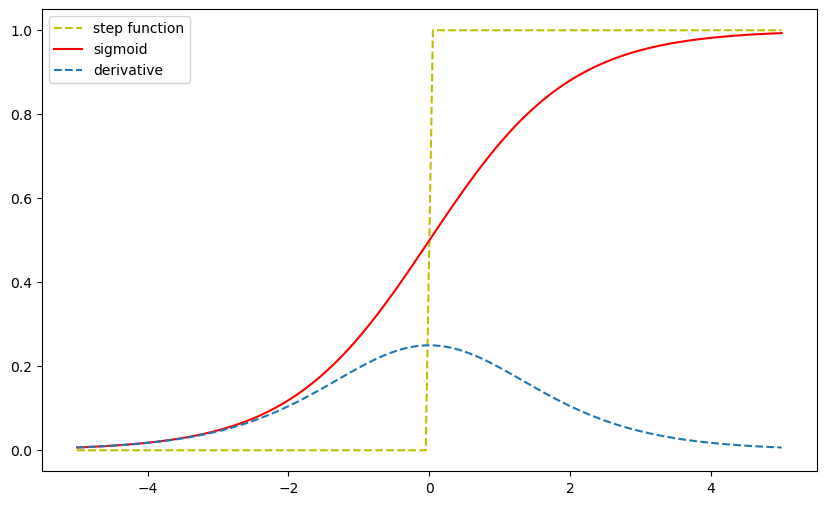

In [27]:
import matplotlib.pyplot as plt

def sigmoid(x, deriv=False):
  if deriv:
    return sigmoid(x) * (1 - sigmoid(x))
  return 1 / (1 + np. exp (-x) )


x = np. linspace(-5, 5, 100)

plt.figure(figsize=(10, 6))
plt.plot(x, np. where(x > 0, 1, 0), 'y--', label='step function')
plt.plot(x, sigmoid(x), 'r', label='sigmoid')
plt.plot(x, sigmoid(x, True), '--', label='derivative')
plt.legend () ;

# One Hidden Layer

Let us now try a similar method/algorithm, except using one hidden layer of perceptrons.

In [29]:
features = 5
samples = 4
units = 5 # Number of hidden layer units

np.random.seed(200)
l0 = np.random.random((samples, features))
w0 = np.random.random((features, units))
w1 = np.random.random((units, 1)) * 0.15
y = np.random.random((samples, 1)) * 0.15

a = 0.01
steps = int(40e3)

In [30]:
for s in range(1, steps + 1):
  l1 = np.dot(l0, w0) # Hidden layer
  l2 = np.dot(l1, w1)
  # Step 1. Update w1 based on the error of the output layer
  e2 = l2 - y
  d2 = e2 #* l2
  u2 = a * np.dot(l1.T, d2)
  w1 -= u2
  # Step 2. Update w0 based on the error of the hidden layer
  e1 = np.dot(d2, w1.T)
  d1 = e1 #* l1
  u1 = a * np.dot(l0.T, d1)
  w0 -= u1
  if s % 2000 == 0:
    mse = (e2 ** 2).mean()
    print(f'step={s:5d} mse={mse: .5f}')

step= 2000 mse= 0.00007
step= 4000 mse= 0.00000
step= 6000 mse= 0.00000
step= 8000 mse= 0.00000
step=10000 mse= 0.00000
step=12000 mse= 0.00000
step=14000 mse= 0.00000
step=16000 mse= 0.00000
step=18000 mse= 0.00000
step=20000 mse= 0.00000
step=22000 mse= 0.00000
step=24000 mse= 0.00000
step=26000 mse= 0.00000
step=28000 mse= 0.00000
step=30000 mse= 0.00000
step=32000 mse= 0.00000
step=34000 mse= 0.00000
step=36000 mse= 0.00000
step=38000 mse= 0.00000
step=40000 mse= 0.00000


Check the predictions from `l2`

In [31]:
l2, y

(array([[0.13259547],
        [0.14809478],
        [0.00240954],
        [0.03067498]]),
 array([[0.13259547],
        [0.14809478],
        [0.00240954],
        [0.03067498]]))

In [35]:
(l2 - y).round(4), (l2 - y).round(4) == 0

(array([[-0.],
        [ 0.],
        [ 0.],
        [-0.]]),
 array([[ True],
        [ True],
        [ True],
        [ True]]))

# Using the scikit-learn MLPClassifier

[Multi-layer Perceptron Classifier docs](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [46]:
import warnings
warnings.simplefilter('ignore')

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model = MLPClassifier(hidden_layer_sizes=(2 * units), max_iter=250)

samples = 10
l0 = np.random.randint(0, 2, (samples, features))
y = np.random.randint(0, 2, (samples, 1))
model.fit(l0, y)


MLPClassifier(hidden_layer_sizes=10, max_iter=250)

In [52]:
l2 = model.predict(l0)
l2
l2 == y.flatten()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True])

In [53]:
accuracy_score(l2, y.flatten())

0.9

# Building a Class Implementation

Notice that separating the forward and backwards steps makes the logic of the training loop much clearer.

In [ ]:
def activation(x, act='linear', deriv=False):
  if act == 'sigmoid':
    if deriv:
      out = activation(x, 'sigmoid', False)
      return out * (1 - out)
    return 1 / (1 + np.exp(-x))
  elif act == 'relu':
    if deriv:
      return np.where(x > 0, 1, 0)
    return np.maximum(x, 0)
  elif act == 'softplus':
    if deriv:
      return activation(x, act='sigmoid')
    return np.log(1 + np.exp(x))
  elif act == 'linear':
    if deriv:
      return 1
    return x
  else:
    raise ValueError('Activation function not known.')

In [3]:
import pandas as pd

class snn:
    def __init__(self, act='linear', lr=0.01, steps=100, verbose=False, psteps=200):
        self.act = act
        self.lr = lr
        self.steps = steps
        self.verbose = verbose
        self.psteps = psteps

    def forward(self):
        ''' Forward propagation.
        '''
        self.l2 = activation(np.dot(self.l0, self.w), self.act)

    def backward(self):
        ''' Backwards propagation.
        '''
        self.e = self.l2 - self.y
        d = self.e * activation(self.l2, self.act, True)
        u = self.lr * np.dot(self.l0.T, d)
        self.w -= u

    def metrics(self, s):
        ''' Performance metrics.
        '''
        mse = (self.e ** 2).mean()
        acc = float((sum(self.l2.round() == self.y)[0]) / len(self.y))
        self.res = pd.concat((self.res,
                              pd.DataFrame({'mse': mse, 'acc': acc}, index=[s,]))
                             )
        if s % self.psteps == 0 and self.verbose:
            print(f'step={s:5d} | mse={mse:.6f}')
            print(f'           | acc={acc:.6f}')

    def fit(self, l0, y, steps=None, seed=None):
        ''' Fitting step.
        '''
        self.l0 = l0
        self.y = y
        if steps is None:
            steps = self.steps
        self.res = pd.DataFrame()
        samples, features = l0.shape
        if seed is not None:
            np.random.seed(seed)
        self.w = np.random.random((features, 1))
        for s in range(1, steps + 1):
            self.forward()
            self.backward()
            self.metrics(s)

    def predict(self, X):
        ''' Prediction step.
        '''
        return activation(np.dot(X, self.w), self.act)

Let's use the `snn` class to train a model.

In [4]:
model = snn(lr=0.01 , act='sigmoid' )

model. fit(10, y, 1000)

model.res.plot(figsize=(10, 6), secondary_y='mse');

NameError: name 'y' is not defined

# Class for a Single Hidden Layer

In [5]:
class shnn:
    def __init__(self, units=12, act='linear', lr=0.01, steps=100,
                 verbose=False, psteps=200, seed=None):
        self.units = units
        self.act = act
        self.lr = lr
        self.steps = steps
        self.verbose = verbose
        self.psteps = psteps
        self.seed = seed

    def initialize(self):
        ''' Initializes the random weights.
        '''
        if self.seed is not None:
            np.random.seed(self.seed)
        samples, features = self.l0.shape
        self.w0 = np.random.random((features, self.units))
        self.w1 = np.random.random((self.units, 1))

    def forward(self):
        ''' Forward propagation.
        '''
        self.l1 = activation(np.dot(self.l0, self.w0), self.act)
        self.l2 = activation(np.dot(self.l1, self.w1), self.act)

    def backward(self):
        ''' Backward propagation.
        '''
        self.e = self.l2 - self.y
        d2 = self.e * activation(self.l2, self.act, True)
        u2 = self.lr * np.dot(self.l1.T, d2)
        self.w1 -= u2
        e1 = np.dot(d2, self.w1.T)
        d1 = e1 * activation(self.l1, self.act, True)
        u1 = self.lr * np.dot(self.l0.T, d1)
        self.w0 -= u1

    def metrics(self, s):
        ''' Performance metrics.
        '''
        mse = (self.e ** 2).mean()
        acc = float((sum(self.l2.round() == self.y)[0]) / len(self.y))
        self.res = pd.concat((self.res,
                              pd.DataFrame({'mse': mse, 'acc': acc}, index=[s,]))
                             )
        if s % self.psteps == 0 and self.verbose:
            print(f'step={s:5d} | mse={mse:.5f}')
            print(f'           | acc={acc:.5f}')

    def fit(self, l0, y, steps=None):
        ''' Fitting step.
        '''
        self.l0 = l0
        self.y = y
        if steps is None:
            steps = self.steps
        self.res = pd.DataFrame()
        self.initialize()
        self.forward()
        for s in range(1, steps + 1):
            self.backward()
            self.forward()
            self.metrics(s)

    def predict(self, X):
        ''' Prediction step.
        '''
        l1 = activation(np.dot(X, self.w0), self.act)
        l2 = activation(np.dot(l1, self.w1), self.act)
        return l2